In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
normal_files=os.listdir('C:/Users/Admin/Desktop/btl1/chest_xray/train/NORMAL/')

print(normal_files[0:5])
print(normal_files[-5:])

['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']
['NORMAL2-IM-1406-0001.jpeg', 'NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-1419-0001.jpeg', 'NORMAL2-IM-1422-0001.jpeg', 'NORMAL2-IM-1423-0001.jpeg']


In [3]:
Pneumonia_files=os.listdir('C:/Users/Admin/Desktop/btl1/chest_xray/train/PNEUMONIA/')

print(Pneumonia_files[0:5])
print(Pneumonia_files[-5:])

['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']
['person99_virus_183.jpeg', 'person9_bacteria_38.jpeg', 'person9_bacteria_39.jpeg', 'person9_bacteria_40.jpeg', 'person9_bacteria_41.jpeg']


In [4]:
print('Normal: ', len(normal_files))
print('Pneumonia: ',len(Pneumonia_files))

Normal:  1341
Pneumonia:  3875


### Creating labels
- 0 --> Normal
- 1 --> Pneumonia

In [5]:
Normal_label=[0]*1341
Pneumonia_label=[1]*3875

In [6]:
print('Normal labels: ',len(Normal_label))
print('Pneumonia labels: ',len(Pneumonia_label))

Normal labels:  1341
Pneumonia labels:  3875


In [7]:
print('With Normal labels: ', Normal_label[0:5])
print('Without Pneumonia labels: ', Pneumonia_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
Without Pneumonia labels:  [1, 1, 1, 1, 1]


Combining both labels into a single column

In [8]:
labels=Normal_label + Pneumonia_label

print('Labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Labels are:  5216
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [9]:
type(labels)

list

### Normal image

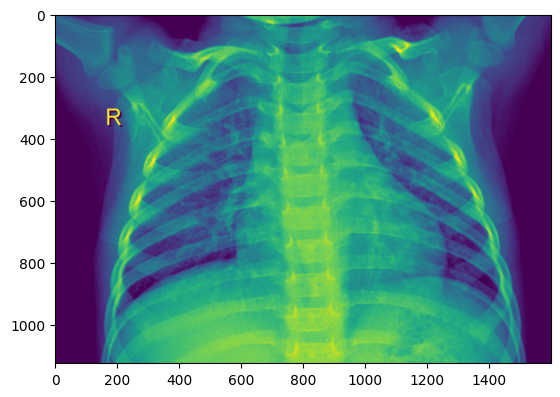

In [10]:
image=mpimg.imread('C:/Users/Admin/Desktop/btl1/chest_xray/train/NORMAL/IM-0125-0001.jpeg')
plt.imshow(image)

plt.show()

### Pneumonia image

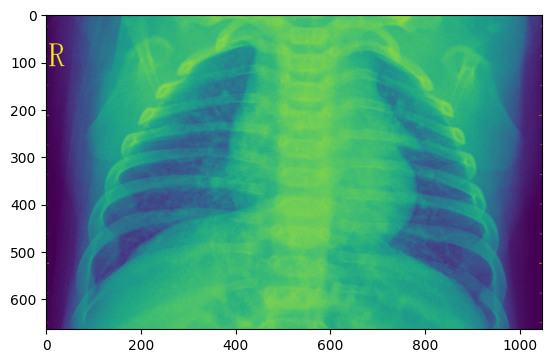

In [11]:
image=mpimg.imread('C:/Users/Admin/Desktop/btl1/chest_xray/train/PNEUMONIA/person1007_virus_1690.jpeg')
plt.imshow(image)

plt.show()

### Image Processing

In [12]:
normal_path=('C:/Users/Admin/Desktop/btl1/chest_xray/train/NORMAL/')
data=[]

for img_file in normal_files:
    image=Image.open(normal_path +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    
Pneumonia_path=('C:/Users/Admin/Desktop/btl1/chest_xray/train/PNEUMONIA/')

for img_file in Pneumonia_files:
    image=Image.open(Pneumonia_path + img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [13]:
type(data)

list

In [14]:
len(data)

5216

In [15]:
data[0]

array([[[22, 22, 22],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [95, 95, 95]],

       [[22, 22, 22],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[21, 21, 21],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[29, 29, 29],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [30, 30, 30],
        [32, 32, 32],
        [32, 32, 32]],

       [[30, 30, 30],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[41, 41, 41],
        [40, 40, 40],
        [39, 39, 39],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [98, 98, 98]]], dtype=uint8)

In [16]:
type(data[0])

numpy.ndarray

In [17]:
data[0].shape

(128, 128, 3)

### Converting data and labels into numpy array

In [18]:
X=np.array(data)
Y=np.array(labels)

In [19]:
type(X)

numpy.ndarray

In [20]:
type(Y)

numpy.ndarray

In [21]:
print(X.shape)
print(Y.shape)

(5216, 128, 128, 3)
(5216,)


### Train Test Split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(5216, 128, 128, 3) (4172, 128, 128, 3) (1044, 128, 128, 3)


### Scaled the data

In [24]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [25]:
X_train[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [178, 178, 178],
        [251, 251, 251],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [179, 179, 179],
        [251, 251, 251],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [178, 178, 178],
        [250, 250, 250],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [120, 120, 120],
        [147, 147, 147],
        [234, 234, 234]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [149, 149, 149],
        [236, 236, 236]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [125, 125, 125],
        [150, 150, 150],
        [235, 235, 235]]

In [26]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.98431373, 0.98431373, 0.98431373],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.98431373, 0.98431373, 0.98431373],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.98039216, 0.98039216, 0.98039216],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

### Model Training

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

c:\Users\Admin\Desktop\btl1\moitruong\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [30]:
history=model.fit(X_train_scaled,Y_train, validation_split=0.1, verbose=1, epochs=5)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - acc: 0.7313 - loss: 0.6460 - val_acc: 0.9474 - val_loss: 0.1766
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - acc: 0.9293 - loss: 0.1794 - val_acc: 0.9498 - val_loss: 0.1176
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - acc: 0.9504 - loss: 0.1293 - val_acc: 0.9402 - val_loss: 0.1863
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 141ms/step - acc: 0.9531 - loss: 0.1322 - val_acc: 0.9641 - val_loss: 0.1410
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - acc: 0.9506 - loss: 0.1384 - val_acc: 0.9689 - val_loss: 0.1035


Accuracy

In [31]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.9761 - loss: 0.0724


### Visualization

#### Loss

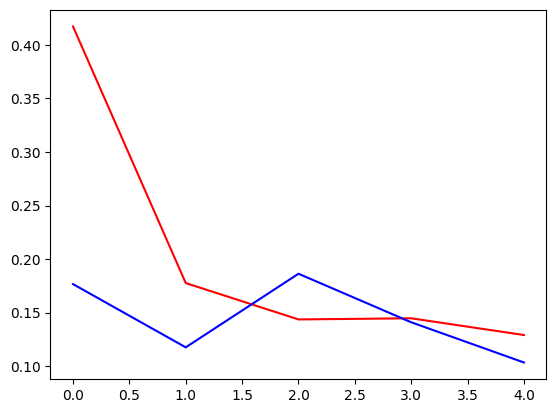

In [32]:
plt.plot(history.history['loss'], label='training loss',color='red')
plt.plot(history.history['val_loss'], label='validation loss',color='blue')

#### Accuracy

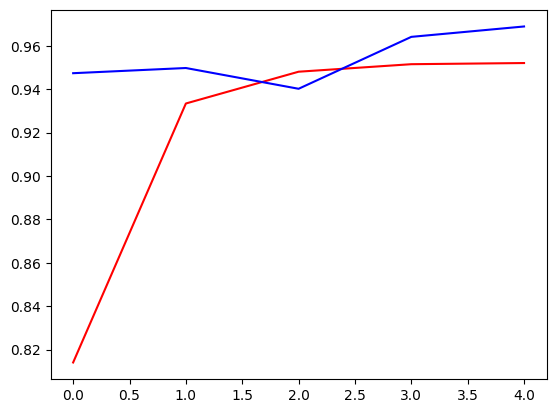

In [33]:
plt.plot(history.history['acc'], label='training accuracy',color='red')
plt.plot(history.history['val_acc'], label='validation accuracy',color='blue')

In [34]:
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [35]:
np.argmax(y_pred[589])

np.int64(1)

In [36]:
Y_test[589]

np.int64(1)

### Prediction 

#### Testing Pneumonia

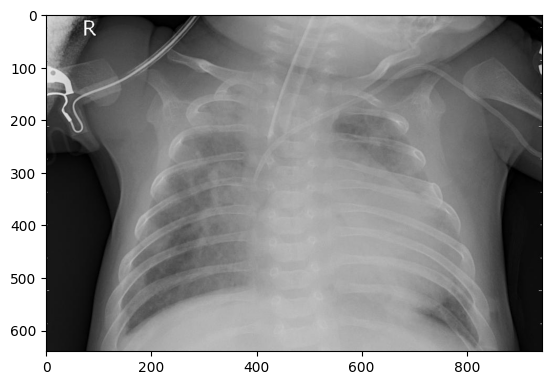

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction Probabilities: [[2.1602013e-05 9.9999893e-01]]
Pneumonia 


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

# Ensure the shape matches the expected input shape of your model
input_image_resized = cv2.resize(input_image, (128, 128))

# Normalize the pixel values
input_image_normalized = input_image_resized / 255.0

# Reshape for model prediction
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))

# Make predictions
input_prediction = model.predict(input_image_reshaped)

# Display the prediction probabilities
print("Prediction Probabilities:", input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the predicted label
if input_pred_label == 1:
    print('Pneumonia ')
else:
    print('Not Pneumonia')

#### Testing Normal 

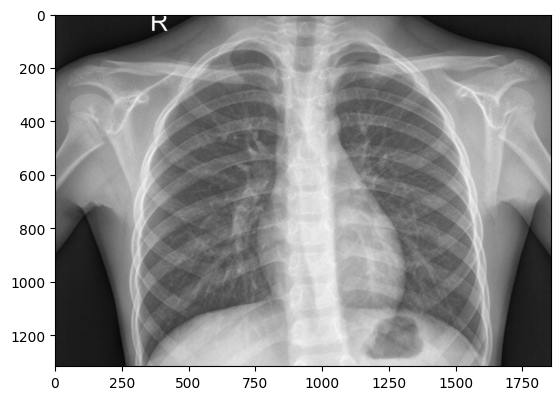

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction Probabilities: [[0.5578011  0.36330664]]
Not Pneumonia


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

# Ensure the shape matches the expected input shape of your model
input_image_resized = cv2.resize(input_image, (128, 128))

# Normalize the pixel values
input_image_normalized = input_image_resized / 255.0

# Reshape for model prediction
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))

# Make predictions
input_prediction = model.predict(input_image_reshaped)

# Display the prediction probabilities
print("Prediction Probabilities:", input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the predicted label
if input_pred_label == 1:
    print('Pneumonia ')
else:
    print('Not Pneumonia')

### Saving The model

In [39]:
from tensorflow.keras.models import load_model

model.save('C:/Users/Admin/Desktop/btl1/Pneumonia_model.h5')

loaded_model = load_model('C:/Users/Admin/Desktop/btl1/Pneumonia_model.h5')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,708 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)